# Live Exercises

Source:  [https://github.com/d-insight/code-bank.git](https://github.com/d-insight/code-bank.git)  
License: [MIT License](https://opensource.org/licenses/MIT). See open source [license](LICENSE) in the Code Bank repository. 

-------------

## Setup

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Create Data

In [2]:
strategy = ['Fwd', 'Opn', '50/50', '1/3FwdPVOpen']
case = {'5%pct':11.22, '25%pct':10.71, 'Budget':10.41, 'Forward':10.26, '75%pct':10.06, '95%pct':9.63}

In [3]:
opp_cost = [54,20,0,-10,-25,-60]
fx = [[-54,-20,0,10,25,60],[0,0,0,0,0,0],[-27,-11,0,5,12,30],[-23,-12,-5,1,11,34]]

In [4]:
oc_s = pd.Series(opp_cost, index=case.keys())

In [5]:
oc_s

5%pct      54
25%pct     20
Budget      0
Forward   -10
75%pct    -25
95%pct    -60
dtype: int64

In [6]:
oc=pd.DataFrame({"OC":oc_s})

In [7]:
fx = pd.DataFrame(data=fx, columns=case.keys(), index=strategy).transpose()

In [8]:
fx

,Fwd,Opn,50/50,1/3FwdPVOpen
5%pct,-54,0,-27,-23
25%pct,-20,0,-11,-12
Budget,0,0,0,-5
Forward,10,0,5,1
75%pct,25,0,12,11
95%pct,60,0,30,34


In [9]:
#fx.to_pickle('fx')
#oc.to_pickle('oc')

In [11]:
oc

,OC
5%pct,54
25%pct,20
Budget,0
Forward,-10
75%pct,-25
95%pct,-60


In [12]:
net = fx.copy()

In [20]:
net['Fwd'] = net['Fwd']+oc["OC"]
net['Opn'] = net['Opn']+oc["OC"] 
net['50/50'] = net['50/50']+oc["OC"]
net['1/3FwdPVOpen'] = net['1/3FwdPVOpen']+oc["OC"] 

In [21]:
#net.to_pickle('net')

## Reshape Data

Only for fx and net.

In [22]:
fx

,Fwd,Opn,50/50,1/3FwdPVOpen
5%pct,-54,0,-27,-23
25%pct,-20,0,-11,-12
Budget,0,0,0,-5
Forward,10,0,5,1
75%pct,25,0,12,11
95%pct,60,0,30,34


In [23]:
fx.reset_index(inplace=True)

In [24]:
fx

,index,Fwd,Opn,50/50,1/3FwdPVOpen
0,5%pct,-54,0,-27,-23
1,25%pct,-20,0,-11,-12
2,Budget,0,0,0,-5
3,Forward,10,0,5,1
4,75%pct,25,0,12,11
5,95%pct,60,0,30,34


In [25]:
fx_long = pd.melt(fx, id_vars='index')
fx_long.rename(columns={'variable':'FX'}, inplace=True)

In [26]:
fx_long

,index,FX,value
0,5%pct,Fwd,-54
1,25%pct,Fwd,-20
2,Budget,Fwd,0
3,Forward,Fwd,10
4,75%pct,Fwd,25
5,95%pct,Fwd,60
6,5%pct,Opn,0
7,25%pct,Opn,0
8,Budget,Opn,0
9,Forward,Opn,0


In [27]:
net

,Fwd,Opn,50/50,1/3FwdPVOpen
5%pct,0,54,27,31
25%pct,0,20,9,8
Budget,0,0,0,-5
Forward,0,-10,-5,-9
75%pct,0,-25,-13,-14
95%pct,0,-60,-30,-26


In [28]:
net.reset_index(inplace=True)
net_long = pd.melt(net, id_vars='index')
net_long.rename(columns={'variable':'NET'}, inplace=True)

In [29]:
net_long

,index,NET,value
0,5%pct,Fwd,0
1,25%pct,Fwd,0
2,Budget,Fwd,0
3,Forward,Fwd,0
4,75%pct,Fwd,0
5,95%pct,Fwd,0
6,5%pct,Opn,54
7,25%pct,Opn,20
8,Budget,Opn,0
9,Forward,Opn,-10


## Plot

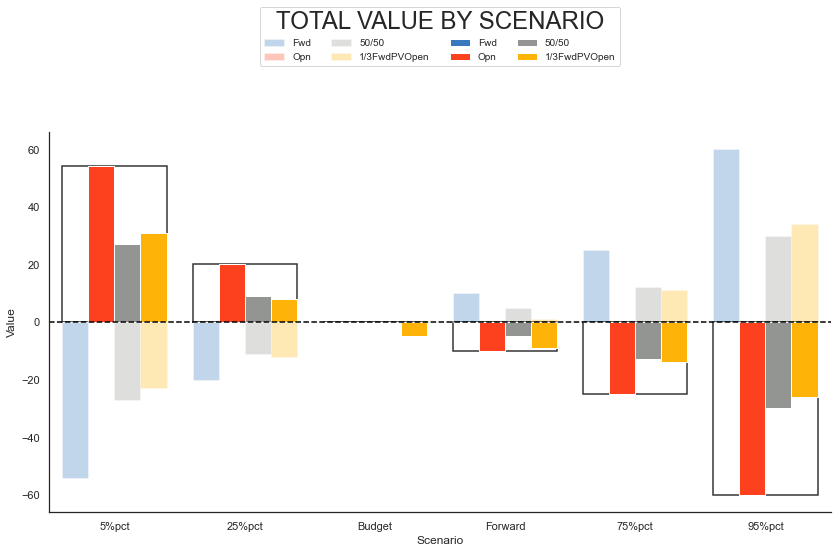

In [50]:
#https://stackoverflow.com/questions/39519609/annotate-bars-with-values-on-pandas-on-seaborn-factorplot-bar-plot
colors = ["windows blue", "orange red", "grey", "amber"]  
myPalette = sns.xkcd_palette(colors)

sns.set(style="white")
fig, ax = plt.subplots(figsize=(14,7))
ax.axhline(0, ls='--', c='black')

ocbar = sns.barplot(x=oc.index.values, y=oc['OC'], linewidth=1.5, facecolor=(1, 1, 0, 0), errcolor=".2", edgecolor=".2")
fxbar = sns.barplot(x='index', y='value', hue='FX', data=fx_long, palette=myPalette, saturation=5, alpha=0.3)
netbar= sns.barplot(x='index', y='value', hue='NET', data=net_long, palette=myPalette, saturation=5)


ax.set(xlabel='Scenario', ylabel='Value')


#legend creation
myLegend=plt.legend(bbox_to_anchor=(0., 1.2, 1., .102), prop ={'size':10}, loc=10, ncol=4,  #left, bottom, width, height
                title=r'TOTAL VALUE BY SCENARIO')                    
myLegend.get_title().set_fontsize('24')

sns.despine()
#fig.savefig('example.png')

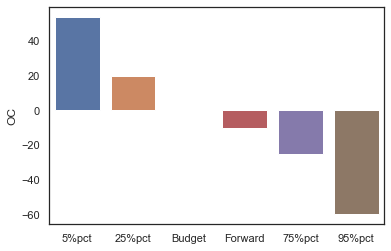

In [35]:
sns.barplot(x=oc.index.values, y=oc['OC'])

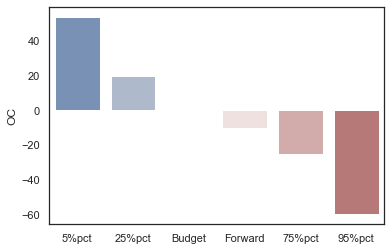

In [36]:
# colors
sns.barplot(x=oc.index.values, y=oc['OC'], palette='vlag')

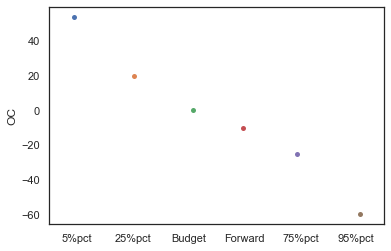

In [37]:
# Let's try points
sns.stripplot(x=oc.index.values, y=oc['OC'])

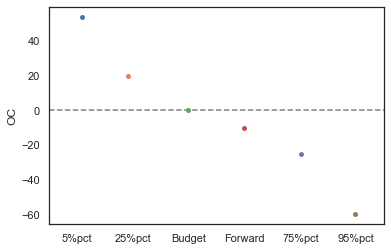

In [38]:
# Add zero line
strip = sns.stripplot(x=oc.index.values, y=oc['OC'])
strip.axhline(0, ls='--', c='grey')

In [42]:
fx.iloc[1]

index           25%pct
Fwd                -20
Opn                  0
50/50              -11
1/3FwdPVOpen       -12
Name: 1, dtype: object

In [40]:
sns.barplot(x=fx.columns.values, y=fx.iloc[1])

ValueError: Neither the `x` nor `y` variable appears to be numeric.

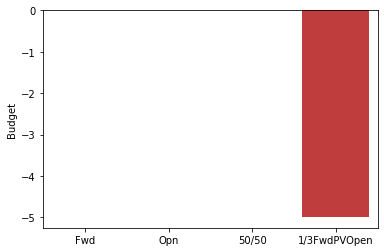

In [342]:
sns.barplot(x=fx.columns.values, y=fx.iloc[2])

Text(0.5, 1.0, '13FwdPVOpn')

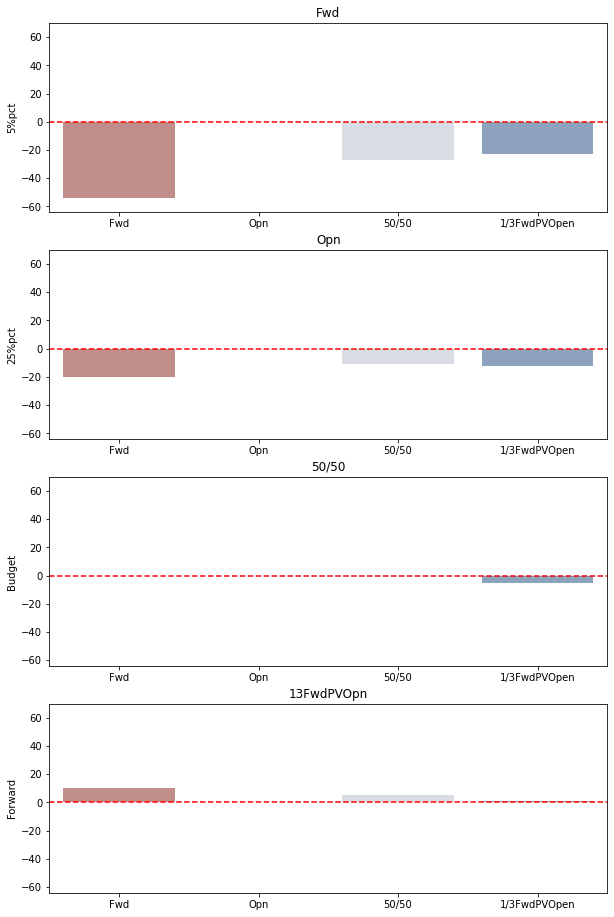

In [345]:
# fix axis, stack

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,16))

for i in range(0,4):
    axes[i].set_ylim([fx.values.min()-10, fx.values.max()+10])

str1 = sns.barplot(x=fx.columns.values, y=fx.iloc[0], ax=axes[0], palette='vlag_r')
str1.axhline(0, ls='--', c='red')
str1.set_title('Fwd')

str2 = sns.barplot(x=fx.columns.values, y=fx.iloc[1], ax=axes[1], palette='vlag_r')
str2.axhline(0, ls='--', c='red')
str2.set_title('Opn')

str3 = sns.barplot(x=fx.columns.values, y=fx.iloc[2], ax=axes[2], palette='vlag_r')
str3.axhline(0, ls='--', c='red')
str3.set_title('50/50')

str3 = sns.barplot(x=fx.columns.values, y=fx.iloc[3], ax=axes[3], palette='vlag_r')
str3.axhline(0, ls='--', c='red')
str3.set_title('13FwdPVOpn')

In [346]:
fx

,Fwd,Opn,50/50,1/3FwdPVOpen
5%pct,-54,0,-27,-23
25%pct,-20,0,-11,-12
Budget,0,0,0,-5
Forward,10,0,5,1
75%pct,25,0,12,11
95%pct,60,0,30,34


Text(0.5, 1.0, '13FwdPVOpn')

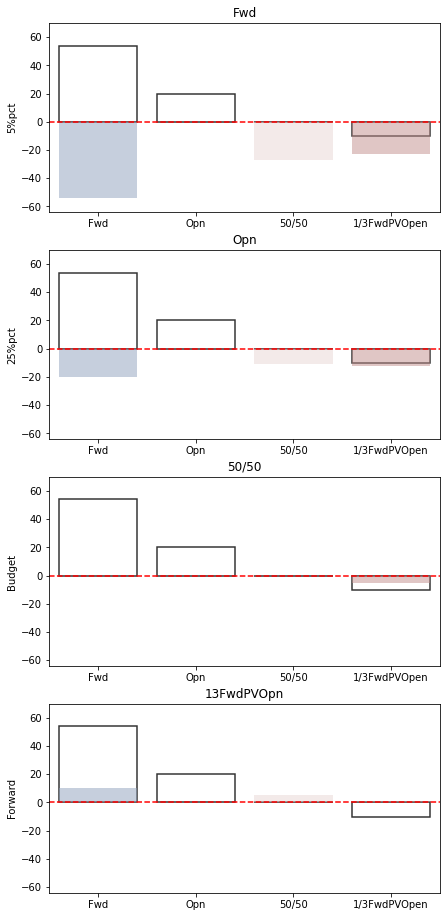

In [350]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(7,16))

for i in range(0,4):
    axes[i].set_ylim([fx.values.min()-10, fx.values.max()+10])
    axes[i].axhline(0, ls='--', c='red')
    
sns.barplot(x=oc.index.values, y=oc['OC'], ax=axes[0], linewidth=1.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
sns.barplot(x=fx.columns.values, y=fx.iloc[0], ax=axes[0], palette='vlag', alpha=0.5)
axes[0].set_title('Fwd')

sns.barplot(x=oc.index.values, y=oc['OC'], ax=axes[1], linewidth=1.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
sns.barplot(x=fx.columns.values, y=fx.iloc[1], ax=axes[1], palette='vlag', alpha=0.5)
axes[1].set_title('Opn')

sns.barplot(x=oc.index.values, y=oc['OC'], ax=axes[2], linewidth=1.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
sns.barplot(x=fx.columns.values, y=fx.iloc[2], ax=axes[2], palette='vlag', alpha=0.5)
axes[2].set_title('50/50')

sns.barplot(x=oc.index.values, y=oc['OC'], ax=axes[3], linewidth=1.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
sns.barplot(x=fx.columns.values, y=fx.iloc[3], ax=axes[3], palette='vlag', alpha=0.5)
axes[3].set_title('13FwdPVOpn')

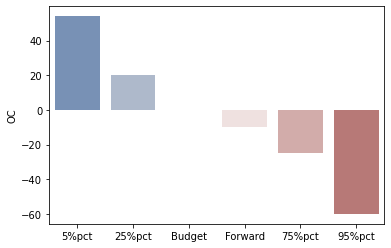

In [240]:
sns.barplot(x=oc.index.values, y=oc['OC'], palette='vlag')

In [ ]:
#https://stackoverflow.com/questions/38609339/pandas-dataframe-to-seaborn-grouped-barchart/38611976

In [351]:
fx

,Fwd,Opn,50/50,1/3FwdPVOpen
5%pct,-54,0,-27,-23
25%pct,-20,0,-11,-12
Budget,0,0,0,-5
Forward,10,0,5,1
75%pct,25,0,12,11
95%pct,60,0,30,34


In [352]:
fx.reset_index(inplace=True)

In [353]:
fx

,index,Fwd,Opn,50/50,1/3FwdPVOpen
0,5%pct,-54,0,-27,-23
1,25%pct,-20,0,-11,-12
2,Budget,0,0,0,-5
3,Forward,10,0,5,1
4,75%pct,25,0,12,11
5,95%pct,60,0,30,34


In [355]:
fx_long = pd.melt(fx, id_vars='index')
fx_long.rename(columns={'variable':'FX'}, inplace=True)

In [356]:
fx_long

,index,FX,value
0,5%pct,Fwd,-54
1,25%pct,Fwd,-20
2,Budget,Fwd,0
3,Forward,Fwd,10
4,75%pct,Fwd,25
5,95%pct,Fwd,60
6,5%pct,Opn,0
7,25%pct,Opn,0
8,Budget,Opn,0
9,Forward,Opn,0


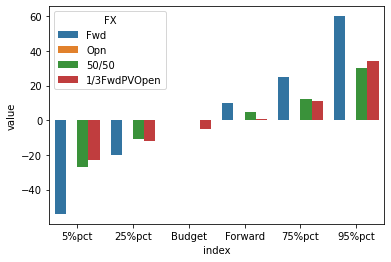

In [357]:
sns.barplot(x='index', y='value', hue='FX', data=fx_long)

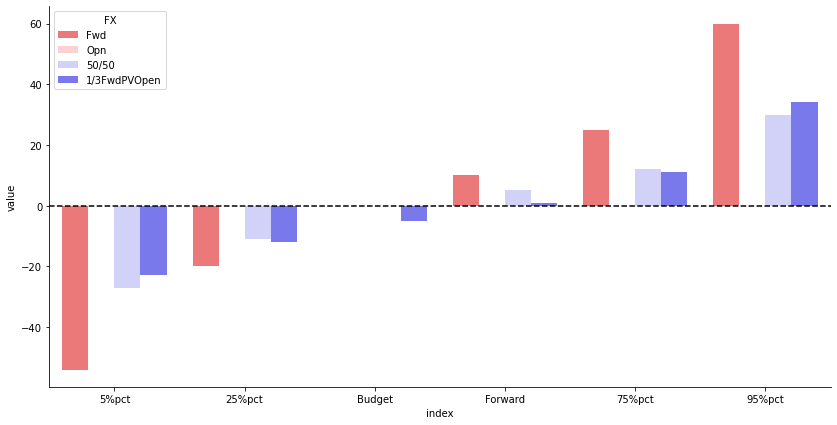

In [358]:
fig, ax = plt.subplots(figsize=(14,7))
ax.axhline(0, ls='--', c='black')

sns.barplot(x='index', y='value', hue='FX', data=fx_long, palette='bwr_r')
sns.despine()

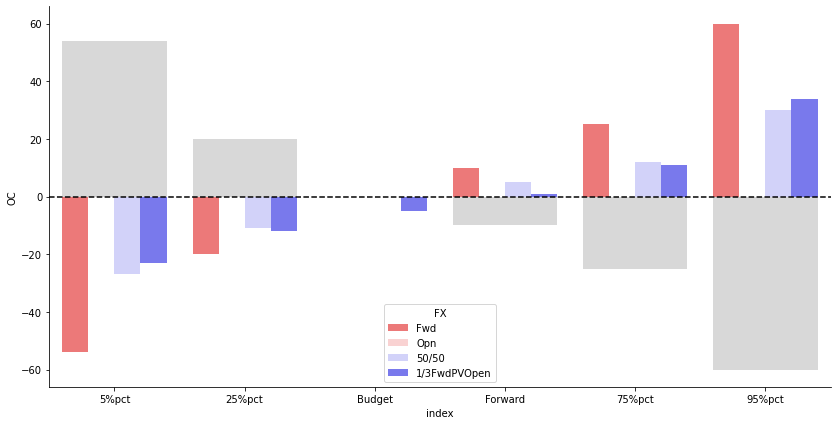

In [365]:
# Let's add OC

fig, ax = plt.subplots(figsize=(14,7))
ax.axhline(0, ls='--', c='black')

sns.barplot(x='index', y='value', hue='FX', data=fx_long, palette='bwr_r')
sns.barplot(x=oc.index.values, y=oc['OC'], facecolor='grey', alpha=0.3)
sns.despine()

In [413]:
from matplotlib.patches import Rectangle

ValueError: Could not interpret input 'strategy'

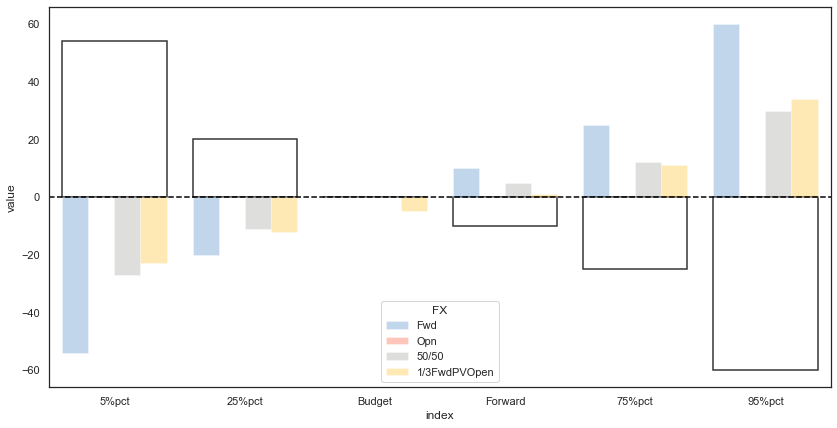

In [31]:
#https://stackoverflow.com/questions/39519609/annotate-bars-with-values-on-pandas-on-seaborn-factorplot-bar-plot

colors = ["windows blue", "orange red", "grey", "amber"]  
myPalette = sns.xkcd_palette(colors)

sns.set(style="white")
fig, ax = plt.subplots(figsize=(14,7))
ax.axhline(0, ls='--', c='black')
ax.set(xlabel='Scenario', ylabel='Value')

ocbar = sns.barplot(x=oc.index.values, y=oc['OC'], linewidth=1.5, facecolor=(1, 1, 0, 0), errcolor=".2", edgecolor=".2")
fxbar = sns.barplot(x='index', y='value', hue='FX', data=fx_long, palette=myPalette, saturation=5, alpha=0.3)
netbar= sns.barplot(x='index', y='value', hue='strategy', data=net_long, palette=myPalette, saturation=5)





#legend creation
myLegend=plt.legend(bbox_to_anchor=(0., 1.2, 1., .102), prop ={'size':10}, loc=10, ncol=4,  #left, bottom, width, height
                title=r'TOTAL PAYOFF BY SCENARIO')                    
myLegend.get_title().set_fontsize('24')



sns.despine(left=True)

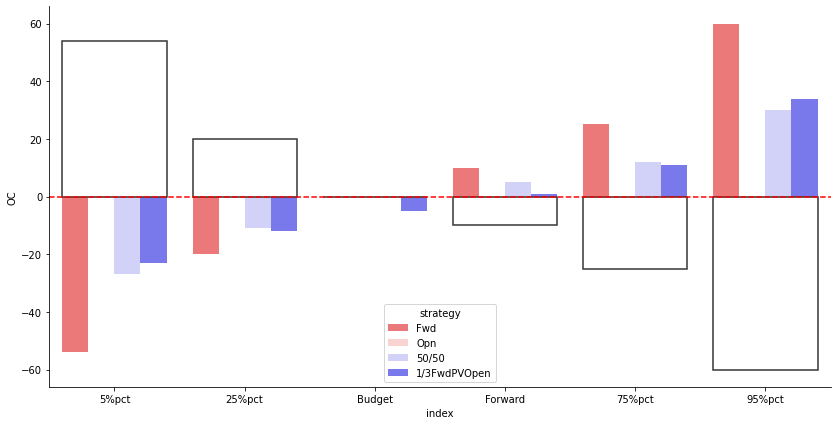

In [279]:
fig, ax = plt.subplots(figsize=(14,7))
ax.axhline(0, ls='--', c='red')

sns.barplot(x='index', y='value', hue='strategy', data=fx_long, palette='bwr_r')
sns.barplot(x=oc.index.values, y=oc['OC'], linewidth=1.5, facecolor=(1, 1, 0, 0), errcolor=".2", edgecolor=".2")
sns.despine()

In [ ]:
# get inspired: http://www.storytellingwithdata.com/blog/2018/3/9/bring-on-the-bar-charts

In [282]:
net

,index,Fwd,Opn,50/50,1/3FwdPVOpen
0,5%pct,0,54,27,31
1,25%pct,0,20,9,8
2,Budget,0,0,0,-5
3,Forward,0,-10,-5,-9
4,75%pct,0,-25,-13,-14
5,95%pct,0,-60,-30,-26


In [281]:
net.reset_index(inplace=True)

In [283]:
net_long = pd.melt(net, id_vars='index')

In [285]:
net_long.rename(columns={'variable':'NET'}, inplace=True)

In [286]:
net_long

,index,strategy,value
0,5%pct,Fwd,0
1,25%pct,Fwd,0
2,Budget,Fwd,0
3,Forward,Fwd,0
4,75%pct,Fwd,0
5,95%pct,Fwd,0
6,5%pct,Opn,54
7,25%pct,Opn,20
8,Budget,Opn,0
9,Forward,Opn,-10


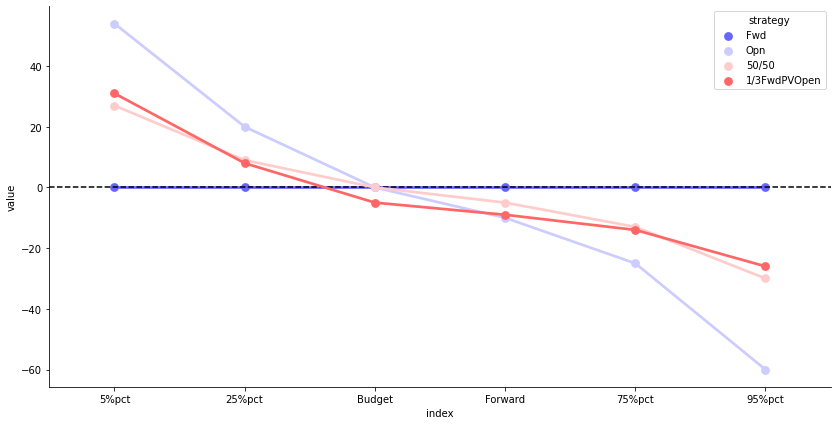

In [290]:
fig, ax = plt.subplots(figsize=(14,7))
ax.axhline(0, ls='--', c='black')

sns.pointplot(x='index', y='value', hue='strategy', data=net_long, palette='bwr')
sns.despine()

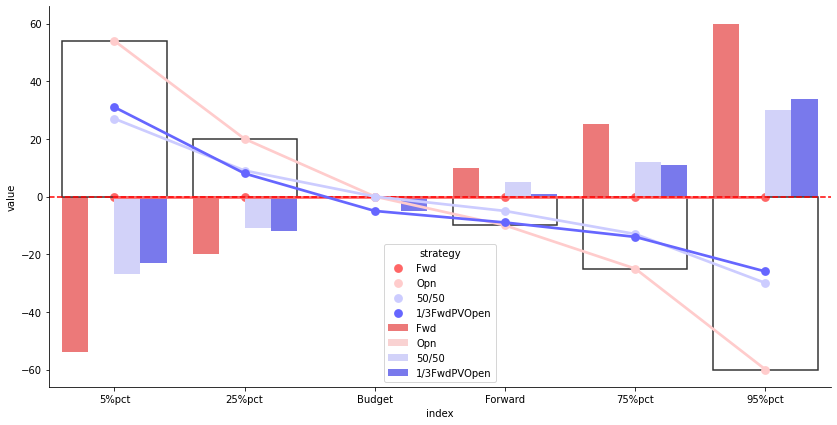

In [294]:
fig, ax = plt.subplots(figsize=(14,7))
ax.axhline(0, ls='--', c='red')

sns.barplot(x='index', y='value', hue='strategy', data=fx_long, palette='bwr_r')
sns.barplot(x=oc.index.values, y=oc['OC'], linewidth=1.5, facecolor=(1, 1, 0, 0), errcolor=".2", edgecolor=".2")
sns.pointplot(x='index', y='value', hue='strategy', data=net_long, palette='bwr_r')
sns.despine()

fig.savefig('example.png')

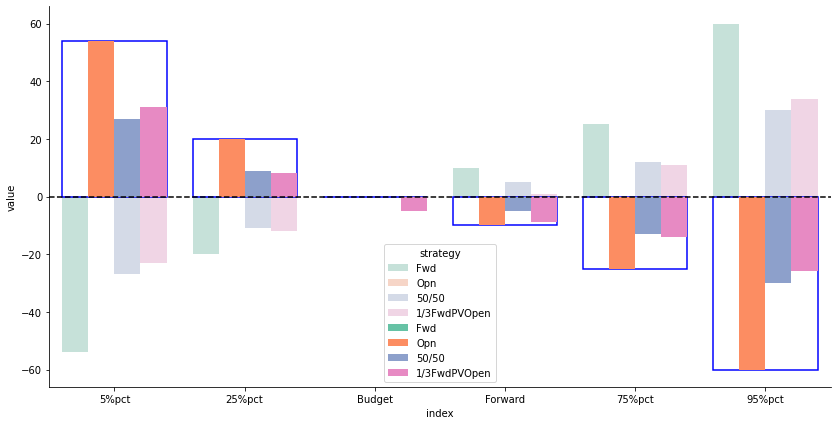

In [323]:
fig, ax = plt.subplots(figsize=(14,7))
ax.axhline(0, ls='--', c='black')

sns.barplot(x='index', y='value', hue='strategy', data=fx_long, palette="Set2", alpha=0.4)
sns.barplot(x=oc.index.values, y=oc['OC'], linewidth=1.5, facecolor=(0, 0, 0, 0), errcolor=".2", edgecolor="blue")
sns.barplot(x='index', y='value', hue='strategy', data=net_long, palette="Set2", saturation=10)
sns.despine()

#fig.savefig('example.png')

In [133]:
np.sign(fx.iloc[0])

Fwd            -1
Opn             0
50/50          -1
1/3FwdPVOpen   -1
Name: 5%pct, dtype: int64

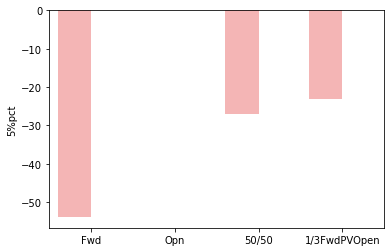

In [147]:
# fix colors
sns.barplot(x=fx.columns.values, y=fx.iloc[0], hue=np.sign(fx.iloc[0]), palette="bwr_r")
plt.legend().set_visible(False)

No handles with labels found to put in legend.


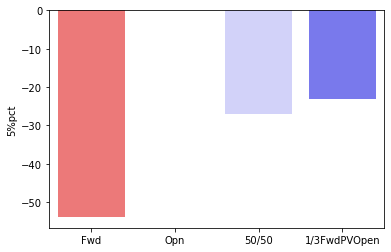

In [152]:
sns.barplot(x=fx.columns.values, y=fx.iloc[0], palette="bwr_r")
plt.legend().set_visible(False)

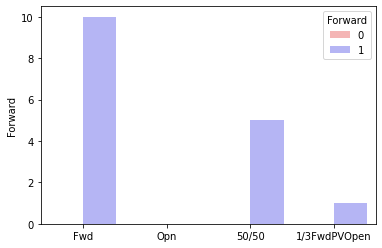

In [145]:
a = sns.barplot(x=fx.columns.values, y=fx.iloc[3], hue=np.sign(fx.iloc[3]), palette="bwr_r")
plt.legend().set_visible(False)

Text(0.5, 1.0, '13FwdPVOpn')

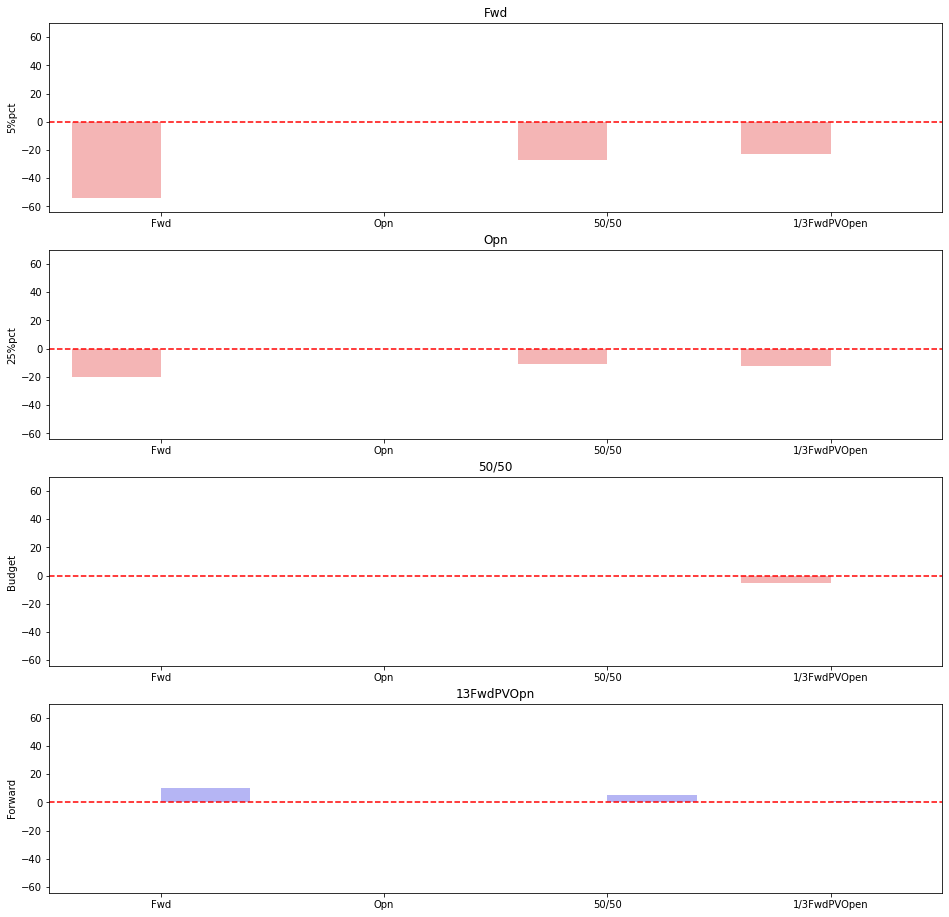

In [148]:

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16,16))

for i in range(0,4):
    axes[i].set_ylim([fx.values.min()-10, fx.values.max()+10])

str1 = sns.barplot(x=fx.columns.values, y=fx.iloc[0], ax=axes[0], hue=np.sign(fx.iloc[0]), palette="bwr_r")
str1.legend().set_visible(False)
str1.axhline(0, ls='--', c='red')
str1.set_title('Fwd')

str2 = sns.barplot(x=fx.columns.values, y=fx.iloc[1], ax=axes[1], hue=np.sign(fx.iloc[1]), palette="bwr_r")
str2.legend().set_visible(False)
str2.axhline(0, ls='--', c='red')
str2.set_title('Opn')

str3 = sns.barplot(x=fx.columns.values, y=fx.iloc[2], ax=axes[2], hue=np.sign(fx.iloc[2]), palette="bwr_r")
str3.legend().set_visible(False)
str3.axhline(0, ls='--', c='red')
str3.set_title('50/50')

str4 = sns.barplot(x=fx.columns.values, y=fx.iloc[3], ax=axes[3], hue=np.sign(fx.iloc[3]), palette="bwr_r")
str4.legend().set_visible(False)
str4.axhline(0, ls='--', c='red')
str4.set_title('13FwdPVOpn')

Text(0.5, 1.0, '13FwdPVOpn')

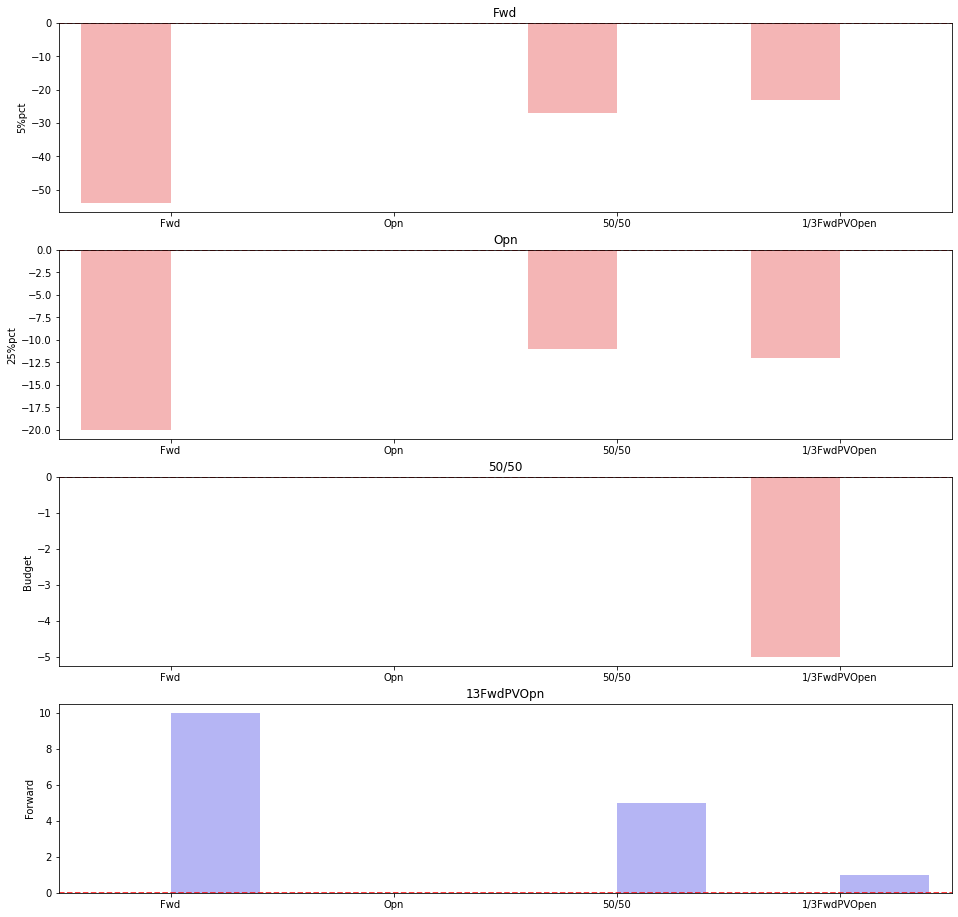

In [149]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16,16))

str1 = sns.barplot(x=fx.columns.values, y=fx.iloc[0], ax=axes[0], hue=np.sign(fx.iloc[0]), palette="bwr_r")
str1.legend().set_visible(False)
str1.axhline(0, ls='--', c='red')
str1.set_title('Fwd')

str2 = sns.barplot(x=fx.columns.values, y=fx.iloc[1], ax=axes[1], hue=np.sign(fx.iloc[1]), palette="bwr_r")
str2.legend().set_visible(False)
str2.axhline(0, ls='--', c='red')
str2.set_title('Opn')

str3 = sns.barplot(x=fx.columns.values, y=fx.iloc[2], ax=axes[2], hue=np.sign(fx.iloc[2]), palette="bwr_r")
str3.legend().set_visible(False)
str3.axhline(0, ls='--', c='red')
str3.set_title('50/50')

str4 = sns.barplot(x=fx.columns.values, y=fx.iloc[3], ax=axes[3], hue=np.sign(fx.iloc[3]), palette="bwr_r")
str4.legend().set_visible(False)
str4.axhline(0, ls='--', c='red')
str4.set_title('13FwdPVOpn')

In [162]:
fx

,Fwd,Opn,50/50,1/3FwdPVOpen
5%pct,-54,0,-27,-23
25%pct,-20,0,-11,-12
Budget,0,0,0,-5
Forward,10,0,5,1
75%pct,25,0,12,11
95%pct,60,0,30,34


In [163]:
fx.reset_index(inplace=True)

In [164]:
fx

,index,Fwd,Opn,50/50,1/3FwdPVOpen
0,5%pct,-54,0,-27,-23
1,25%pct,-20,0,-11,-12
2,Budget,0,0,0,-5
3,Forward,10,0,5,1
4,75%pct,25,0,12,11
5,95%pct,60,0,30,34


In [ ]:
fx.rename(columns={'index':'FX'}, inplace=True)

In [156]:
fx_long = fx.melt()

In [157]:
fx_long

,variable,value
0,Fwd,-54
1,Fwd,-20
2,Fwd,0
3,Fwd,10
4,Fwd,25
5,Fwd,60
6,Opn,0
7,Opn,0
8,Opn,0
9,Opn,0


Text(0.5, 1.0, 'TBD')

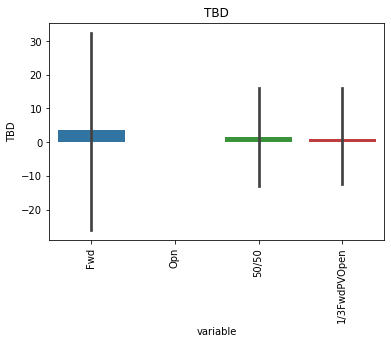

In [161]:
sns.barplot(x='variable', y='value', data=fx_long)
plt.xticks(rotation=90)
plt.ylabel('TBD')
plt.title('TBD')


In [ ]:
fx[:1].values

In [ ]:
sns.barplot(x=fx.columns.values, y=fx[:1].values[0])

In [ ]:
fx.iloc[0]

In [ ]:
sns.barplot(x=fx.columns.values, y=fx.iloc[0])

In [ ]:
sns.barplot(x=fx.columns.values, y=fx.iloc[0], palette='vlag_r')

In [ ]:
fx.iloc[1]

In [ ]:
opn_gr = sns.barplot(x=fx.columns.values, y=fx.iloc[1])
opn_gr.axhline(0, ls='--', c='red')
#opn_gr.text(0.5,25, "Some text")


In [ ]:
sns.barplot(x=fx.columns.values, y=fx.iloc[2])

In [ ]:
fx.values.min()

In [ ]:
for i in range(0,4):
    print(i)

Text(0.5, 1.0, '13FwdPVOpn')

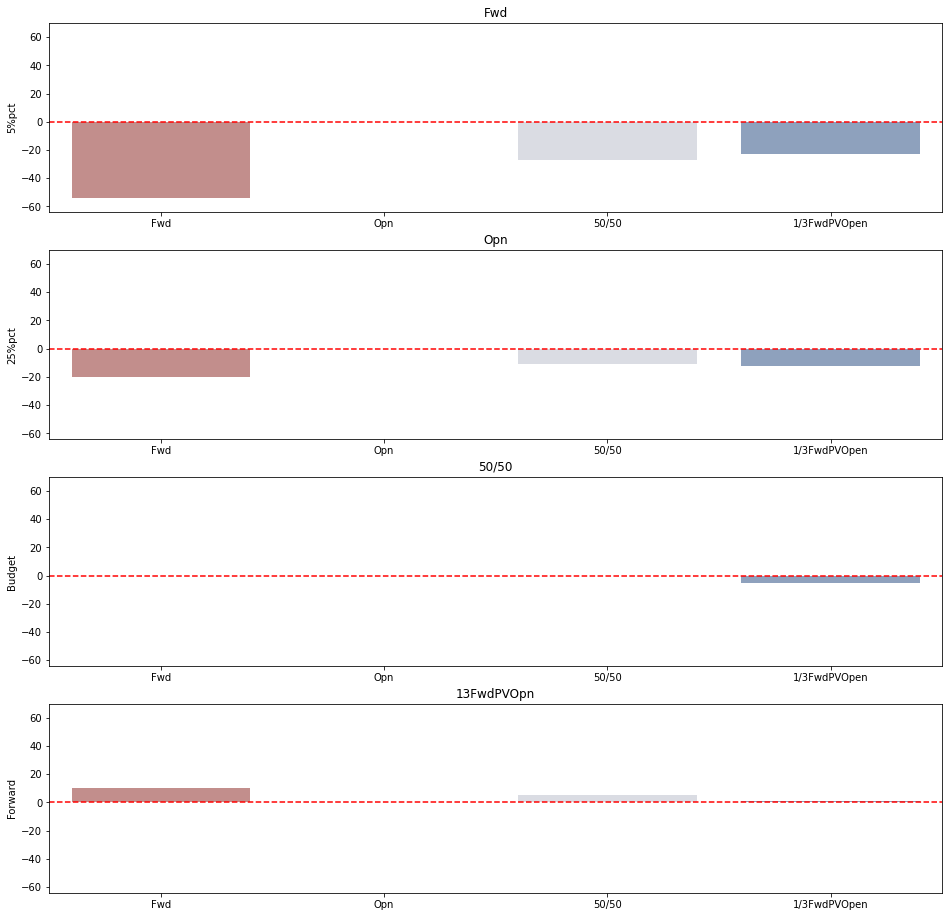

In [153]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16,16))

for i in range(0,4):
    axes[i].set_ylim([fx.values.min()-10, fx.values.max()+10])

str1 = sns.barplot(x=fx.columns.values, y=fx.iloc[0], ax=axes[0], palette='vlag_r')
str1.axhline(0, ls='--', c='red')
str1.set_title('Fwd')

str2 = sns.barplot(x=fx.columns.values, y=fx.iloc[1], ax=axes[1], palette='vlag_r')
str2.axhline(0, ls='--', c='red')
str2.set_title('Opn')

str3 = sns.barplot(x=fx.columns.values, y=fx.iloc[2], ax=axes[2], palette='vlag_r')
str3.axhline(0, ls='--', c='red')
str3.set_title('50/50')

str3 = sns.barplot(x=fx.columns.values, y=fx.iloc[3], ax=axes[3], palette='vlag_r')
str3.axhline(0, ls='--', c='red')
str3.set_title('13FwdPVOpn')




In [154]:
fx

,Fwd,Opn,50/50,1/3FwdPVOpen
5%pct,-54,0,-27,-23
25%pct,-20,0,-11,-12
Budget,0,0,0,-5
Forward,10,0,5,1
75%pct,25,0,12,11
95%pct,60,0,30,34


In [ ]:
fx

In [ ]:
fx.transpose()

In [165]:
# https://stackoverflow.com/questions/38609339/pandas-dataframe-to-seaborn-grouped-barchart/38611976
import seaborn as sns
import numpy as np

np.random.seed(123)
index = np.random.randint(1,100,10)

x1 = pd.date_range('2000-01-01','2015-01-01').map(lambda t: t.strftime('%Y-%m-%d'))
dts = np.random.choice(x1,10)

benchmark = np.random.randn(10)
portfolio = np.random.randn(10)

df = pd.DataFrame({'Index': index,
                   'Dates': dts,
                   'Benchmark': benchmark,
                   'Portfolio': portfolio},
                    columns = ['Index','Dates','Benchmark','Portfolio'])

In [166]:
df

,Index,Dates,Benchmark,Portfolio
0,67,2011-06-01,0.126526,-0.747651
1,93,2002-07-31,-1.301489,-0.984868
2,99,2000-04-21,2.207427,-0.748569
3,18,2009-07-13,0.522742,0.240367
4,84,2003-09-25,0.465645,-1.855637
5,58,2007-12-04,0.724915,-1.779455
6,87,2009-02-07,1.495827,-2.750224
7,98,2002-12-28,0.746581,-0.234158
8,97,2005-01-21,-1.100985,-0.695981
9,48,2012-06-13,-1.410301,-1.774134


In [169]:
fx

,level_0,index,Fwd,Opn,50/50,1/3FwdPVOpen
0,0,5%pct,-54,0,-27,-23
1,1,25%pct,-20,0,-11,-12
2,2,Budget,0,0,0,-5
3,3,Forward,10,0,5,1
4,4,75%pct,25,0,12,11
5,5,95%pct,60,0,30,34


In [168]:
fx.reset_index(inplace=True)

In [ ]:
fx.set_index(fx['index'], inplace=True)

In [ ]:
fx.rename(columns={'index':'FX'}, inplace=True)

In [150]:
fx

,Fwd,Opn,50/50,1/3FwdPVOpen
5%pct,-54,0,-27,-23
25%pct,-20,0,-11,-12
Budget,0,0,0,-5
Forward,10,0,5,1
75%pct,25,0,12,11
95%pct,60,0,30,34


In [ ]:
fx_long = fx.melt(id_vars=['FX'], value_vars=['5%pct','25%pct','Budget','Forward','75%pct','95%pct'])


In [ ]:
fx_long

In [ ]:
oc

In [ ]:
fx_long

In [ ]:
oc.name = "oc"

In [ ]:
fx_long.merge(oc, how='left', left_on=fx_long['variable'])

In [ ]:
ax = sns.barplot(x="day", y="total_bill", data=tips,
...                  linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")